In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10000)

In [3]:
# load data
df = pd.read_csv('nhis_00012.csv')

In [4]:
df.head()
df = df[(df['HIPRIVATEE'].isin([2,3])) & (df['ASTATFLG']==1)].copy()
df.drop(columns=['NHISHID','NHISPID','SAMPWEIGHT','HIPRIVATEE','ASTATFLG','DVINTWELL','HINOTYR', 'EMPHI','HINOTCOVE','HICHIPE'],inplace=True)

## Recoding Variables
For readibility, we decided to recode certain variables. Categorical variables which were coded numerically were broken down into legible categories. Moreover, we changed variables we thought to be binary but were not coded as such to be 0 or 1. 

There's a couple of variables which are quite weird because of them existing in different universes. For example, non-smokers were not asked how often they smoked. Therefore, we switched the NaNs to a 0 in such cases. 

In [5]:
# recode HIMCAIDE
df['HIMCAIDE'] = df['HIMCAIDE'].replace({
    1: 0,
    2: 1,
    3: 1
}).where(df['HIMCAIDE'].isin([1, 2, 3]), np.nan).astype('Int64')

# recode HIMCAIRE
df['HIMCAREE'] = df['HIMCAREE'].replace({
    1: 0,
    2: 1,
    3: 1
}).where(df['HIMCAREE'].isin([1, 2, 3]), np.nan).astype('Int64')

In [6]:
# recode REGION
df['REGION'] = df['REGION'].replace({1: 'Northeast', 2: 'North Central/Midwest', 3: 'South', 4: 'West'})

# recode SEX
df['SEX'] = df['SEX'].astype(object)
df.loc[df['SEX'].isin([7, 8, 9]), 'SEX'] = np.nan
df.loc[df['SEX'] == 1, 'SEX'] = 'Male'
df.loc[df['SEX'] == 2, 'SEX'] = 'Female'

# recode AGE
df.loc[df['AGE'].isin([997,998,999]), 'AGE'] = np.nan

# recode MARSTCUR
df['MARSTCUR'] = df['MARSTCUR'].astype(object)
df.loc[df['MARSTCUR'].isin([0, 9]), 'MARSTCUR'] = np.nan
df.loc[df['MARSTCUR'] == 1, 'MARSTCUR'] = 'Married, spouse present'
df.loc[df['MARSTCUR'] == 2, 'MARSTCUR'] = 'Married, spouse absent'
df.loc[df['MARSTCUR'] == 3, 'MARSTCUR'] = 'Married, spouse in household unknown'
df.loc[df['MARSTCUR'] == 4, 'MARSTCUR'] = 'Separated'
df.loc[df['MARSTCUR'] == 5, 'MARSTCUR'] = 'Divorced'
df.loc[df['MARSTCUR'] == 6, 'MARSTCUR'] = 'Widowed'
df.loc[df['MARSTCUR'] == 7, 'MARSTCUR'] = 'Living with partner'
df.loc[df['MARSTCUR'] == 8, 'MARSTCUR'] = 'Never Married'

# recode RACENEW
df['RACENEW'] = df['RACENEW'].astype(object)
df.loc[df['RACENEW'] == 100, 'RACENEW'] = 'White'
df.loc[df['RACENEW'] == 200, 'RACENEW'] = 'Black/African American'
df.loc[df['RACENEW'] == 542, 'RACENEW'] = 'American Indian/Alaska Native and Any Other Race'
df.loc[df['RACENEW'] == 400, 'RACENEW'] = 'Asian only'
df.loc[df['RACENEW'] == 300, 'RACENEW'] = 'American Indian/Alaska Native only'
df.loc[df['RACENEW'].isin([510, 997, 998, 999]), 'RACENEW'] = 'Other Race and Multiple Race' 

# recode CITIZEN
df['CITIZEN'] = df['CITIZEN'].astype(object)
df.loc[df['CITIZEN'] == 1, 'CITIZEN'] = 0
df.loc[df['CITIZEN'] == 2, 'CITIZEN'] = 1
df.loc[df['CITIZEN'].isin([7, 8, 9]), 'CITIZEN'] = np.nan

# recode ARMFEV
df['ARMFEV'] = df['ARMFEV'].astype(object)
df.loc[df['ARMFEV'] == 0, 'ARMFEV'] = np.nan
df.loc[df['ARMFEV'] == 11, 'ARMFEV'] = 0
df.loc[df['ARMFEV'] == 20, 'ARMFEV'] = 1
df.loc[df['ARMFEV'].isin([98, 99, 97]), 'ARMFEV'] = np.nan
df.loc[df['ARMFEV'] == 12, 'ARMFEV'] = 0


In [7]:
# recode EDUC
df['EDUC'] = df['EDUC'].astype(object)
df.loc[df['EDUC'] == 201, 'EDUC'] = 'High School Graduate'
df.loc[df['EDUC'] == 301, 'EDUC'] = 'Some college, no degree'
df.loc[df['EDUC'] == 0, 'EDUC'] = np.nan
df.loc[df['EDUC'] == 505, 'EDUC'] = 'Professional School or Doctoral degree, topcoded (MD, DDS, DVM, JD, PhD, EdD)'
df.loc[df['EDUC'] == 303, 'EDUC'] = 'AA degree: academic program'
df.loc[df['EDUC'] == 400, 'EDUC'] = "Bachelor's degree (BA,AB,BS,BBA)"
df.loc[df['EDUC'] == 202, 'EDUC'] = 'GED or equivalent'
df.loc[df['EDUC'] == 103, 'EDUC'] = 'Grades 1-11 (no further detail)'
df.loc[df['EDUC'] == 501, 'EDUC'] = "Master's degree (MA,MS,Med,MBA)"
df.loc[df['EDUC'] == 302, 'EDUC'] = 'AA degree: technical/vocational/occupational'
df.loc[df['EDUC'] == 116, 'EDUC'] = '12th grade, no diploma'
df.loc[df['EDUC'] == 999, 'EDUC'] = np.nan
df.loc[df['EDUC'] == 997, 'EDUC'] = np.nan

In [8]:
# recode POVERTY
df['POVERTY'] = df['POVERTY'].astype(object)
df.loc[df['POVERTY'] == 11, 'POVERTY'] = 'Under 0.50'
df.loc[df['POVERTY'] == 12, 'POVERTY'] = '0.50 to 0.74'
df.loc[df['POVERTY'] == 13, 'POVERTY'] = '0.75 to 0.99'
df.loc[df['POVERTY'] == 21, 'POVERTY'] = '1.00 to 1.24'
df.loc[df['POVERTY'] == 22, 'POVERTY'] = '1.25 to 1.49'
df.loc[df['POVERTY'] == 23, 'POVERTY'] = '1.50 to 1.74'
df.loc[df['POVERTY'] == 24, 'POVERTY'] = '1.75 to 1.99'
df.loc[df['POVERTY'] == 31, 'POVERTY'] = '2.00 to 2.49'
df.loc[df['POVERTY'] == 32, 'POVERTY'] = '2.50 to 2.99'
df.loc[df['POVERTY'] == 33, 'POVERTY'] = '3.00 to 3.49'
df.loc[df['POVERTY'] == 34, 'POVERTY'] = '3.50 to 3.99'
df.loc[df['POVERTY'] == 35, 'POVERTY'] = '4.00 to 4.49'
df.loc[df['POVERTY'] == 36, 'POVERTY'] = '4.50 to 4.99'
df.loc[df['POVERTY'] == 37, 'POVERTY'] = '5.00 and over'

In [9]:
# recode EMPSTAT
df['EMPSTAT'] = df['EMPSTAT'].astype(object)
df.loc[df['EMPSTAT'] == 100, 'EMPSTAT'] = 'Employed'
df.loc[df['EMPSTAT'] == 0, 'EMPSTAT'] = np.nan
df.loc[df['EMPSTAT'] == 200, 'EMPSTAT'] = 'Not Employed'
df.loc[df['EMPSTAT'] == 999, 'EMPSTAT'] = np.nan
df.loc[df['EMPSTAT'] == 'Not Employed', 'EMPSTAT'] = 0
df.loc[df['EMPSTAT'] == 'Employed', 'EMPSTAT'] = 1

In [10]:
df.loc[df['HOURSWRK'].isin([97, 98, 99]), 'HOURSWRK'] = np.nan

In [11]:
# recode GOTRET
df['GOTRET'] = df['GOTRET'].astype(object)
df.loc[df['GOTRET'] == 2, 'GOTRET'] = 'SSDI'
df.loc[df['GOTRET'] == 1, 'GOTRET'] = 'SSI'
df.loc[df['GOTRET'].isin([9, 0, 7, 8]), 'GOTRET'] = np.nan

In [12]:
# recode HEALTH
df['HEALTH'] = df['HEALTH'].astype(object)
df.loc[df['HEALTH'] == 3, 'HEALTH'] = 'Good'
df.loc[df['HEALTH'] == 2, 'HEALTH'] = 'Very Good'
df.loc[df['HEALTH'] == 1, 'HEALTH'] = 'Excellent'
df.loc[df['HEALTH'] == 4, 'HEALTH'] = 'Fair'
df.loc[df['HEALTH'] == 5, 'HEALTH'] = 'Poor'
df.loc[df['HEALTH'].isin([7, 9]), 'HEALTH'] = np.nan

In [13]:
df['DVINT'] = df['DVINT'].replace({
    100: 'Never',
    200: 'Less than 1 year',
    201: 'Visits in the past 2 weeks',
    202: '2 weeks to less than 6 months',
    203: 'Under 6 months',
    204: '6 months to less than 12 months',
    300: '1 year or more',
    301: '1 year',
    302: '1 year to less than 2 years',
    303: '1 year to less than 3 years',
    304: '2 years to less than 3 years',
    305: '2 years to less than 5 years',
    306: '2 years',
    307: '2 to 4 years',
    308: '3 to 4 years',
    309: '3 years to less than 5 years',
    310: 'More than 3 years',
    400: '5 years or more',
    401: '5 to 9 years',
    402: 'More than 10 years'
}).where(df['DVINT'].isin(range(100,403)), np.nan)

df['URGCAREYRNO'] = df['URGCAREYRNO'].replace({
    0: '0 times',
    1: '1 time',
    2: '2 times',
    3: '3 times',
    4: '4 times',
    5: '5+ times',
}).where(df['URGCAREYRNO'].isin(range(0,6)), np.nan)

df['ERYRNO'] = df['ERYRNO'].replace({
    10: 'No visits',
    20: '1 visit',
    30: '2 to 3 visits',
    31: '2 visits',
    32: '3 visits',
    40: '4 or more visits',
    41: '4 to 9 visits',
    42: '4 to 5 visits',
    43: '6 to 7 visits',
    44: '8 to 9 visits',
    45: '10 to 12 visits',
    46: '13 or more visits',
    47: '13 to 15 visits',
    48: '16 or more visits'
}).where(df['ERYRNO'].isin(range(10,49)), np.nan)

df['WORMEDBILL'] = df['WORMEDBILL'].replace({
    1: 'Very worried',
    2: 'Somewhat worried',
    3: 'Not at all worried'
}).where(df['WORMEDBILL'].isin(range(1,4)), np.nan)

df['HIMILITE'] = np.select(
    [df['HIMILITE'] == 10, df['HIMILITE'].isin(range(20, 26))],
    [0, 1],
    default=np.nan
)

df['GOTWELF'] = np.select(
    [df['GOTWELF'] == 21, df['GOTWELF']==10],
    [0, 1],
    default=np.nan
)



In [14]:
# change vars values from 1,2 to 0,1
def replace_yes_no(column):
    return column.replace({1: 0, 2: 1}).where(column.isin([1, 2]), np.nan).astype('Int64')

cols_to_replace = ['MDEXUPADV','ARTHGLUPEV', 'ASTHMAEV', 'HOSPNGHT','THERAPYR','SAWMENT',
                   'DELAYCOST', 'DELAYINS','YDELAYMEDYR','YSKIMPMEDYR','YSKIPMEDYR', 'HIPROBPAYR',
                   'CHEARTDIEV', 'CHRFATIGEV', 'CHOLHIGHEV', 'DEMENTIAEV',
                   'DEPRESSEV', 'DIABETICEV','HEARTATTEV', 'HYPERTENEV','STROKEV', 'COPDEV',
                   'IMSPCHC', 'HRAUSES','GLASSLENS', 'CANCEREV', 'GOTSSISSDI', 'YDELAYMENTAL','FAMKIDNO']
df[cols_to_replace] = df[cols_to_replace].apply(replace_yes_no)



In [15]:
# recode ALCANYTP
df['ALCANYTP'] = df['ALCANYTP'].replace({
    1: 'Every day',
    2: 'Week',
    3: 'Month',
    4: 'Year',
    5: 'Never/None'
}).where(df['ALCANYTP'].isin(range(1,6)), np.nan)

df['ALCANYTP'] = df['ALCANYTP'].fillna(0)

# recode SMOKFREQNOW
df['SMOKFREQNOW'] = df['SMOKFREQNOW'].replace({
    1: 'Not at all',
    2: 'Some days',
    3: 'Every day',
}).where(df['SMOKFREQNOW'].isin(range(1,4)), np.nan)

df['SMOKFREQNOW'] = df['SMOKFREQNOW'].fillna(0)
df['YSKIMPMEDYR'] = df['YSKIMPMEDYR'].fillna(0)
df['YSKIPMEDYR'] = df['YSKIPMEDYR'].fillna(0)
df['YDELAYMEDYR'] = df['YDELAYMEDYR'].fillna(0)

# recode LAMTWRK
df['LAMTWRK'] = df['LAMTWRK'].replace({
    1: 'Not limited in work',
    2: 'Limited in kind/amt of work',
    3: 'Unable to work',
}).where(df['LAMTWRK'].isin(range(1,4)), np.nan)

df = df[df['BMICALC'] != 996]
df = df[~df['GOTSSISSDI'].isin([7, 8, 9])]


In [16]:
num_samples = df.shape[0]

# replacing "Unknown-refused", "Unknown-not ascertained", and "Unknown-don't know" responses with N/A
df.loc[df['HIP1COST'].isin([99997,99998,99999]),'HIP1COST'] = np.nan
df.loc[df['HIP2COST'].isin([99997,99998,99999]),'HIP2COST'] = np.nan

# COUNTING # OF 'UNKNOWN' RESPONSES FOR HIP1COST AND/OR HIP2COST
num_na_hip1cost = df['HIP1COST'].isna().sum()
num_na_hip2cost = df['HIP2COST'].isna().sum()
print(f"{num_na_hip1cost}({(100*num_na_hip1cost/num_samples):.2f}%) individuals responded 'Unknown' when asked for the out-of-pocket premium cost of their primary insurance plan.")
print(f"{num_na_hip2cost}({(100*num_na_hip2cost/num_samples):.2f}%) individuals responded 'Unknown' when asked for the out-of-pocket premium cost of their secondary insurance plan.")

# total number of rows for which HIP1COST or HIP2COST is unknown
num_na_hipcost = (df['HIP1COST'].isna() | df['HIP2COST'].isna()).sum()
print(f"{num_na_hipcost}({(100*num_na_hipcost/num_samples):.2f}%) individuals responded 'Unknown' for either out-of-pocket premium cost of their primary or secondary insurance plan.")

3061(19.51%) individuals responded 'Unknown' when asked for the out-of-pocket premium cost of their primary insurance plan.
111(0.71%) individuals responded 'Unknown' when asked for the out-of-pocket premium cost of their secondary insurance plan.
3114(19.85%) individuals responded 'Unknown' for either out-of-pocket premium cost of their primary or secondary insurance plan.


In [17]:
# MISSINGNESS - dropping the rows for which HIP1COST or HIP2COST is unknown 
df.drop(df[(df['HIP1COST'].isna() | df['HIP2COST'].isna())].index,inplace=True)

In [18]:
# combining HIP1COST and HIP2COST into one response variable for the total out-of-pocket cost
df['HIPCOST'] = df['HIP1COST']+df['HIP2COST']

## EDA
We made some graphs to take a look at the distribution of our different variables. 

<Figure size 1000x600 with 0 Axes>

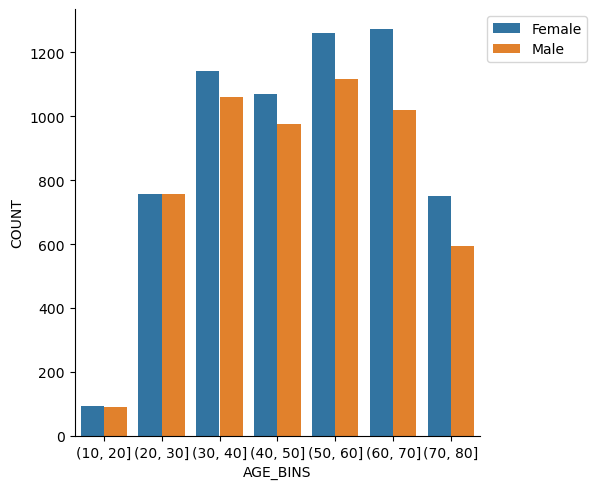

In [19]:
plt.figure(figsize=(10, 6))
age_bins = pd.cut(df['AGE'],bins=np.arange(10,90,10))
df['AGE_BINS'] = pd.Categorical(age_bins,ordered=True)

age_counts = df.groupby('AGE_BINS',observed=False)['SEX'].value_counts().unstack().reset_index()
age_counts['AGE_BINS'] = age_counts['AGE_BINS'].astype(str)
age_counts = age_counts.melt(id_vars="AGE_BINS", value_vars=["Female", "Male"], var_name="SEX", value_name="COUNT")

age_sex_plot = sns.catplot(data=age_counts, x="AGE_BINS", y="COUNT", hue="SEX",kind='bar',legend_out=False)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1));

<Axes: xlabel='REGION', ylabel='HIPCOST'>

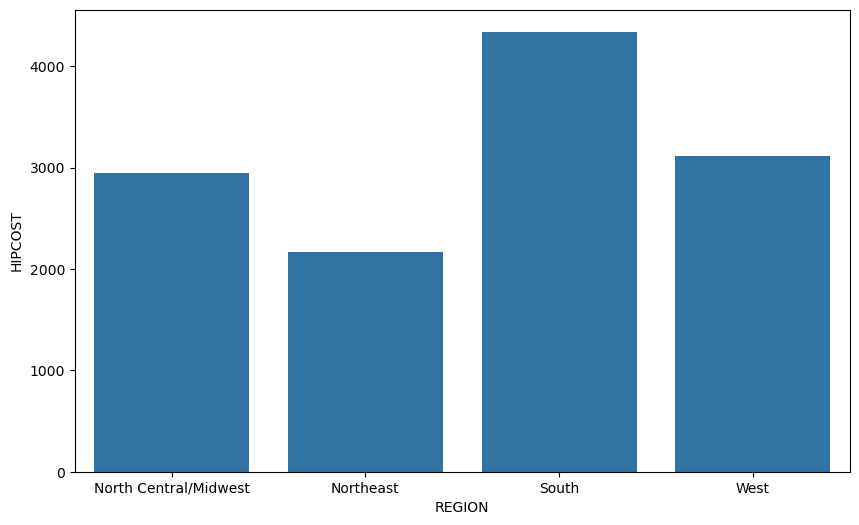

In [20]:
plt.figure(figsize=(10, 6))
region_counts = df.groupby('REGION',observed=False).count()['HIPCOST']
sns.barplot(region_counts)

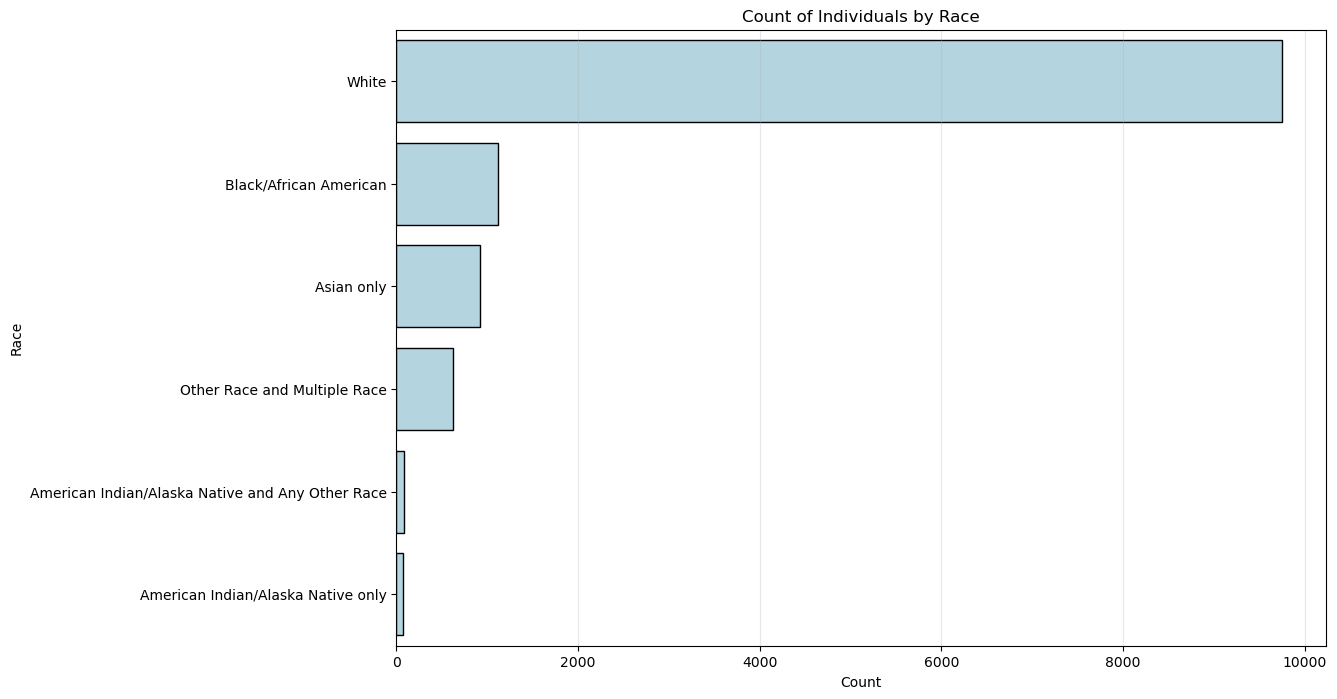

In [21]:
plt.figure(figsize=(12, 8))  

race_counts = df['RACENEW'].value_counts()

sns.barplot(y=race_counts.index, x=race_counts.values, color='lightblue', edgecolor='black')

plt.title('Count of Individuals by Race')
plt.xlabel('Count')
plt.ylabel('Race')
plt.grid(axis='x', alpha=0.3)

plt.show()

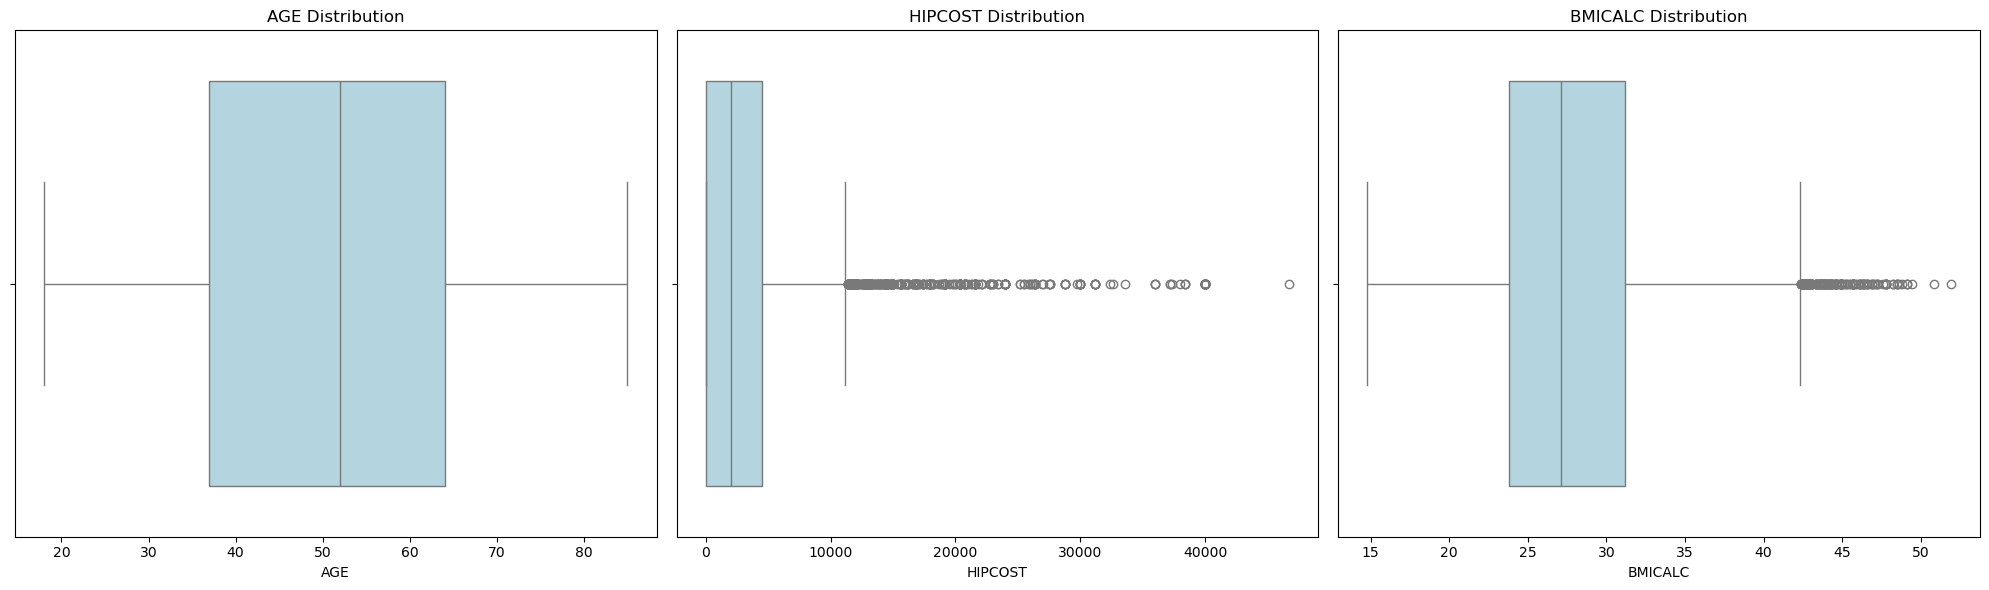

In [ ]:
binary_predictors = [
    'HIMCAIDE', 'HIMCAREE', 'CITIZEN', 'ARMFEV', 'GOTSSISSDI', 
    'YSKIMPMEDYR', 'YSKIPMEDYR', 'YDELAYMEDYR', 'MDEXUPADV', 'ARTHGLUPEV', 
    'ASTHMAEV', 'HOSPNGHT', 'THERAPYR', 'SAWMENT', 'DELAYCOST', 'DELAYINS', 
    'HIPROBPAYR', 'CHEARTDIEV', 'CHRFATIGEV', 'CHOLHIGHEV', 
    'DEMENTIAEV', 'DEPRESSEV', 'DIABETICEV', 'HEARTATTEV', 'HYPERTENEV', 
    'STROKEV', 'COPDEV', 'IMSPCHC', 'HRAUSES', 'GLASSLENS', 'CANCEREV', 
    'GOTWELF', 'HIMILITE'
]

categorical_predictors = [
    'REGION', 'SEX', 'MARSTCUR', 'RACENEW', 'EDUC', 'POVERTY', 'EMPSTAT', 
    'GOTRET', 'HEALTH', 'DVINT', 'URGCAREYRNO', 'ERYRNO', 'WORMEDBILL', 
    'ALCANYTP', 'SMOKFREQNOW', 'LAMTWRK'
]

continuous_predictors = [
    'AGE', 'HIPCOST', 'BMICALC'
]

<Axes: >

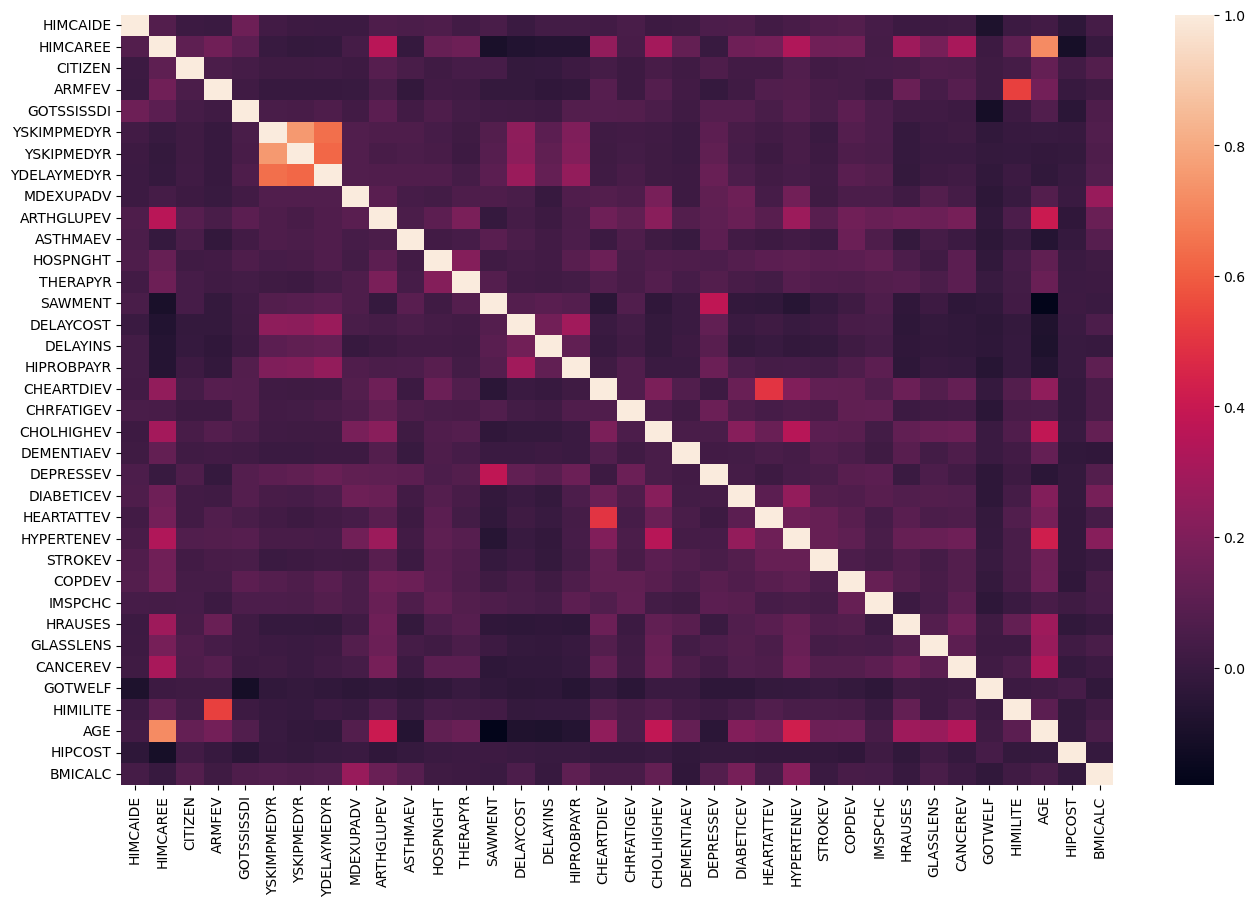

In [26]:
heatmap_variables = [
    'HIMCAIDE', 'HIMCAREE', 'CITIZEN', 'ARMFEV', 'GOTSSISSDI', 
    'YSKIMPMEDYR', 'YSKIPMEDYR', 'YDELAYMEDYR', 'MDEXUPADV', 'ARTHGLUPEV', 
    'ASTHMAEV', 'HOSPNGHT', 'THERAPYR', 'SAWMENT', 'DELAYCOST', 'DELAYINS', 
    'HIPROBPAYR', 'CHEARTDIEV', 'CHRFATIGEV', 'CHOLHIGHEV', 
    'DEMENTIAEV', 'DEPRESSEV', 'DIABETICEV', 'HEARTATTEV', 'HYPERTENEV', 
    'STROKEV', 'COPDEV', 'IMSPCHC', 'HRAUSES', 'GLASSLENS', 'CANCEREV', 
    'GOTWELF',  'HIMILITE','AGE','HIPCOST', 'BMICALC'
]

plt.figure(figsize=(16,10))
sns.heatmap(df[heatmap_variables].corr(),fmt='.2g')

/var/folders/r6/s1mfdg050hx_pdtk7ys_wv780000gn/T/ipykernel_7752/2920778595.py:43: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


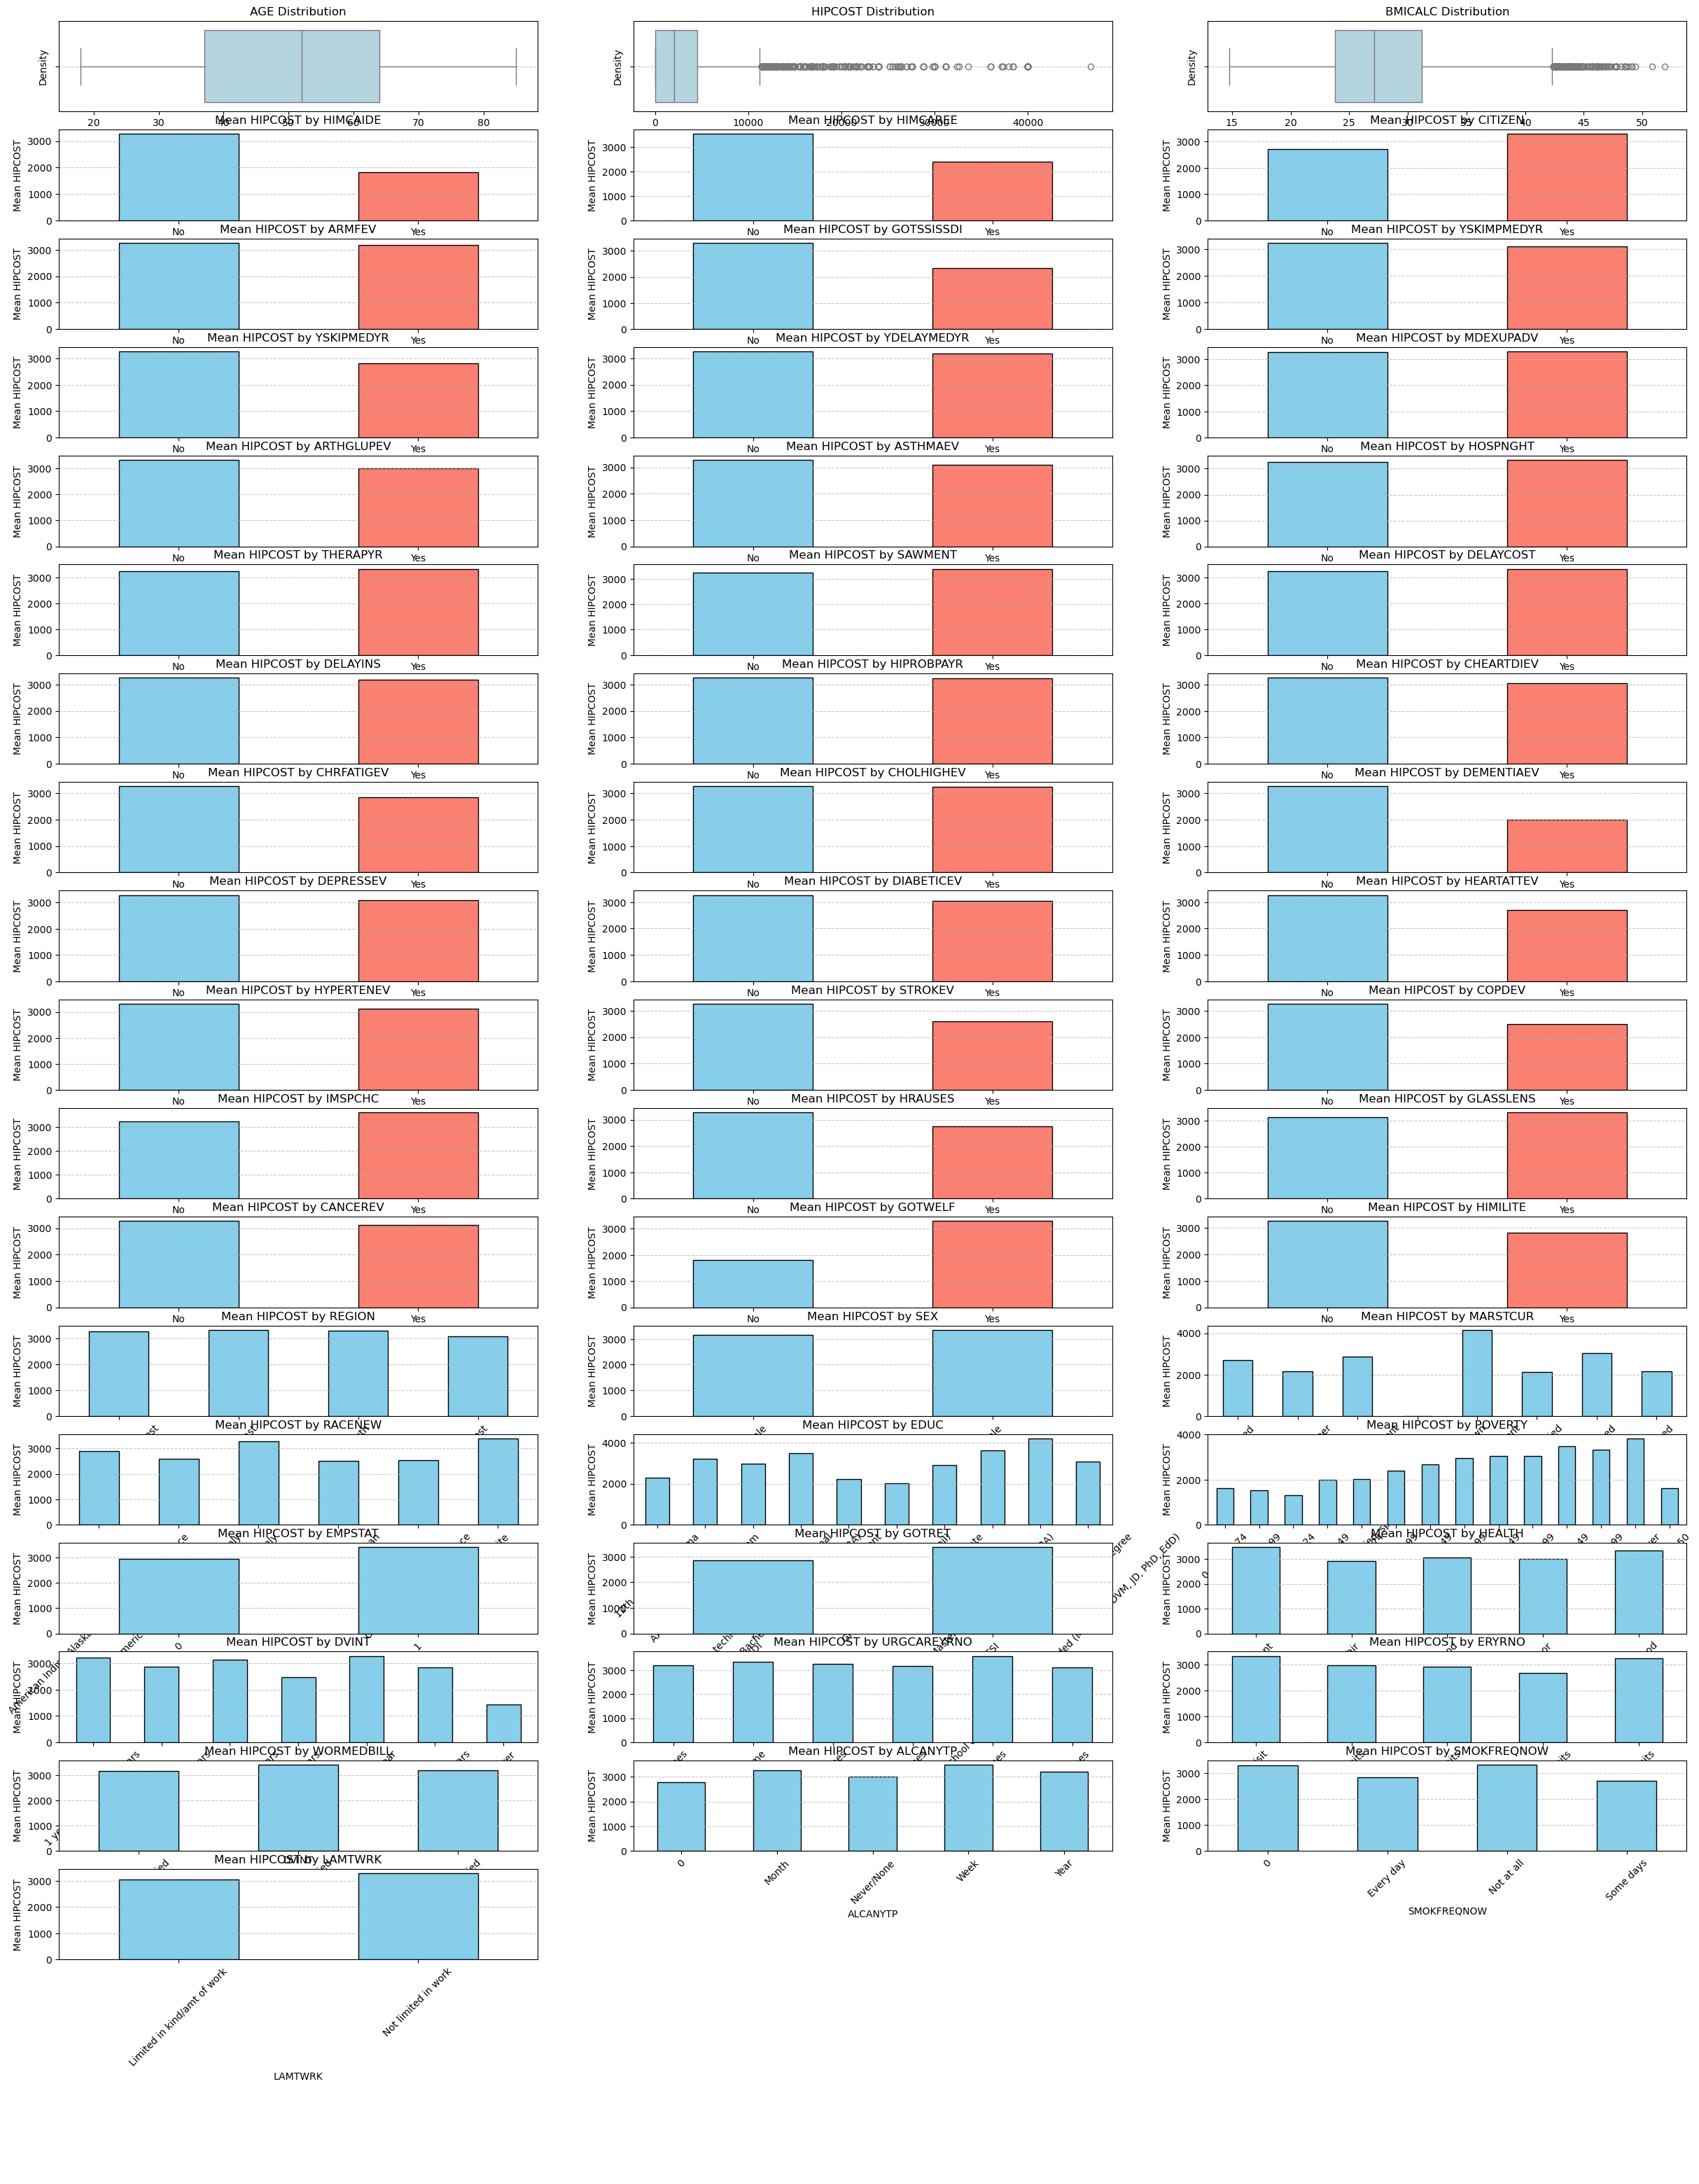

In [41]:
rows, cols = 20, 3
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(30, 40))
axes = axes.flatten()  # Flatten axes array for easy iteration

# Track plot index for placing each plot
plot_idx = 0

# Plot for Continuous Predictors (Boxplots)
for predictor in continuous_predictors:
    sns.boxplot(x=df[predictor], ax=axes[plot_idx], color="lightblue")
    axes[plot_idx].set_title(f'{predictor} Distribution', fontsize=12)
    axes[plot_idx].set_xlabel(predictor, fontsize=10)
    axes[plot_idx].set_ylabel("Density", fontsize=10)
    axes[plot_idx].grid(axis='y', linestyle='--', alpha=0.7)
    plot_idx += 1

# Plot for Binary Predictors (Mean HIPCOST bar plot)
for predictor in binary_predictors:
    mean_cost = df.groupby(predictor)['HIPCOST'].mean()
    mean_cost.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black', ax=axes[plot_idx])
    axes[plot_idx].set_title(f'Mean HIPCOST by {predictor}', fontsize=12)
    axes[plot_idx].set_xlabel(predictor, fontsize=10)
    axes[plot_idx].set_ylabel('Mean HIPCOST', fontsize=10)
    axes[plot_idx].set_xticklabels(['No', 'Yes'], rotation=0)
    axes[plot_idx].grid(axis='y', linestyle='--', alpha=0.7)
    plot_idx += 1

# Plot for Categorical Predictors (Mean HIPCOST bar plot)
for predictor in categorical_predictors:
    mean_cost = df.groupby(predictor)['HIPCOST'].mean()
    mean_cost.plot(kind='bar', color='skyblue', edgecolor='black', ax=axes[plot_idx])
    axes[plot_idx].set_title(f'Mean HIPCOST by {predictor}', fontsize=12)
    axes[plot_idx].set_xlabel(predictor, fontsize=10)
    axes[plot_idx].set_ylabel('Mean HIPCOST', fontsize=10)
    axes[plot_idx].tick_params(axis='x', rotation=45)
    axes[plot_idx].grid(axis='y', linestyle='--', alpha=0.7)
    plot_idx += 1

# Hide any unused subplots if total plots < grid slots
for i in range(plot_idx, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()